# universal function

除了通用的序列操作外,numpy还支持`universal function`即泛函,简写`ufunc`,它是一种向量化计算技术,会对数组中的每一个最底层的标量元素做相同的操作,且会自动对齐作为参数的数组.

`ufunc`的形参为若干标量,返回值为1个标量,在调用时则参数是若干个数组或至少一个数组配一些标量,返回值也是数组,实际执行过程就是`ufunc`定义的操作同步的沿每个参数向量的固定方向根据维度情况执行,结果则放到对应的位置.这种操作可以非常容易的并行化因此可以大大提高了效率.

我们可以实际测试下python自带的迭代和universal function的性能差距

In [3]:
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

In [4]:
test = np.arange(int(1e5))
print(test)

[    0     1     2 ... 99997 99998 99999]


In [5]:
%timeit -n 3 map(lambda x:x**2,test)

The slowest run took 4.38 times longer than the fastest. This could mean that an intermediate result is being cached.
363 ns ± 273 ns per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [6]:
%timeit -n 3 test**2

The slowest run took 8.46 times longer than the fastest. This could mean that an intermediate result is being cached.
150 µs ± 121 µs per loop (mean ± std. dev. of 7 runs, 3 loops each)


提速近1000倍可见universal function的高效

## 广播

`universal function`的另一个特性是两个ndarray对象可以对应项计算,这一特性被称作广播

当俩数组形状不同的时候,那就会进行广播处理

1. 让所有数组向其中维数最多的数组看齐,shape不足的部分通过在前面加1补齐
2. 输出数组的shape属性是输入数组shape属性在各轴上的最大值
3. 如果输入数组的某个轴长度是1或输出数组对应数组对应轴的长度相同,这个数组就够用来计算,否则出错
4. 当输入数组的某个轴长度为1时,沿着该轴运算时都用此轴上的第一组值

看例子:

### 相同shape

In [7]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
b = np.arange(3,15).reshape(3,4)
b

array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10],
       [11, 12, 13, 14]])

In [9]:
a+b

array([[ 3,  5,  7,  9],
       [11, 13, 15, 17],
       [19, 21, 23, 25]])

### 不同shape在对应轴上广播

In [10]:
a = np.arange(0,60,10).reshape(-1,1)
print(a)
a.shape

[[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]]


(6, 1)

In [11]:
b = np.arange(0,5)
print(b)
b.shape

[0 1 2 3 4]


(5,)

In [12]:
c = a+b
print(c)
c.shape

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]
 [50 51 52 53 54]]


(6, 5)

## 与常量做四则运算

ndarray对象支持python支持的四则运算接口,包括幂运算,而且都是universal function

In [11]:
X = np.arange(10).reshape(2,5)
print(X)

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [12]:
X+2

array([[ 2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11]])

In [13]:
X-2

array([[-2, -1,  0,  1,  2],
       [ 3,  4,  5,  6,  7]])

In [14]:
X*2

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

In [15]:
X/2

array([[0. , 0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. , 4.5]])

In [16]:
X**2

array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

In [17]:
Y = np.arange(2,12).reshape(2,5)
Y

array([[ 2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11]])

In [18]:
X+Y

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20]])

In [19]:
X-Y

array([[-2, -2, -2, -2, -2],
       [-2, -2, -2, -2, -2]])

In [20]:
X*Y

array([[ 0,  3,  8, 15, 24],
       [35, 48, 63, 80, 99]])

In [21]:
X/Y

array([[0.        , 0.33333333, 0.5       , 0.6       , 0.66666667],
       [0.71428571, 0.75      , 0.77777778, 0.8       , 0.81818182]])

In [22]:
X**Y

array([[          0,           1,          16,         243,        4096],
       [      78125,     1679616,    40353607,  1073741824, 31381059609]])

## 比较运算

python的比较操作也都是universal function,只是返回的结果是bool值

In [23]:
X>5

array([[False, False, False, False, False],
       [False,  True,  True,  True,  True]])

In [24]:
X<5

array([[ True,  True,  True,  True,  True],
       [False, False, False, False, False]])

In [25]:
X==5

array([[False, False, False, False, False],
       [ True, False, False, False, False]])

In [26]:
X>=5

array([[False, False, False, False, False],
       [ True,  True,  True,  True,  True]])

In [27]:
X<=5

array([[ True,  True,  True,  True,  True],
       [ True, False, False, False, False]])

In [28]:
2<=X<=6

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## 其他的函数

numpy中还定义了其他的常用universal function具体可以看官方<https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs>

## 自定义ufunc


有的时候自带的ufunc不能满足需要,numpy允许自定义ufunc

### 使用接口`np.frompyfunc(func, nin, nout)`

例:用一个分段函数描述三角波

In [29]:
def triangle_wave(x,c,c0,hc):
    """三角波"""
    x = x - int(x)
    if x >= c: r = 0.0
    elif x < c0: r = x / c0*hc
    else: r = (c-x) / (c-c0) * hc
    return r

In [30]:
x = np.linspace(0,2,1000)
y1 = np.array([triangle_wave(t,0.6,0.4,1.0) for t in x])
triangl_ufunc1 = np.frompyfunc(triangle_wave,4,1)

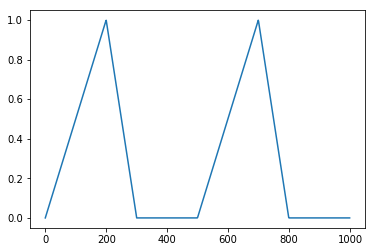

In [31]:
y2 = triangl_ufunc1(x,0.6,0.4,1.0)
plt.plot(range(len(y2)),y2)
plt.show()

### 使用接口`np.vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False, signature=None)`直接将python函数转化为ufunc

In [33]:
triangl_ufunc2 = np.vectorize(triangle_wave)
triangl_ufunc2.__doc__

'三角波'

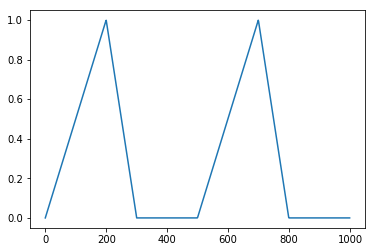

In [34]:
y3 = triangl_ufunc2(x,0.6,0.4,1.0)
plt.plot(range(len(y3)),y3)
plt.show()

## ufunc的方法

ufunc本身也是对象,它有固定的几个个方法可以执行一些额外操作.具体的有如下几种:

### `at(a, indices, b=None)`

at用于指定下标执行函数,未被指定的就不会执行函数,注意其返回值为None,但它会改变第一个参数数组中对应元素的值.

In [35]:
a = np.array([1, 2, 3, 4])
np.negative.at(a, [0, 1])
print(a)

[-1 -2  3  4]


In [36]:
a = np.array([1, 2, 3, 4])
np.add.at(a,[0,1],1)
print(a)

[2 3 3 4]


### `reduce`


reduce和原生python中的reduce差不多,就是rfold,折叠操作的特化

In [37]:
np.add.reduce([1,2,3]) # 相当于sum

6

In [38]:
np.add.reduce([[1,2,3],[6,7,8]],axis=1) #可以指定延哪条轴折叠

array([ 6, 21])

### `accumulate`

accumulate和python3中functiontools新增的累积函数accumulate一样

In [39]:
np.add.accumulate([1,2,3])

array([1, 3, 6])

### `outer`

outer,会对俩数组中每两对元素组合进行运算.

In [40]:
np.add.outer([1,2,3,4,5],[2,3,4])

array([[3, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

### `reduceat(a, indices, axis=0, dtype=None, out=None)`

指定范围执行reduce操作.相当于`ufunc.reduce(a[indices[i]:indices[i+1]])`.

特殊情况是

1. 如果i+1<i,那么直接去a的第i位即a[i]
2. 最后一位时i+1 = a.shape[axis].

在一维的情况下可以每两位组成一个范围对,然后通过切片操作隔位取值以过滤掉中间没有计算的部分

In [41]:
x=np.arange(8)
print(x)

[0 1 2 3 4 5 6 7]


In [42]:
x.shape

(8,)

In [43]:
np.add.reduceat(x,[0,4, 1,5, 2,6, 3,7])

array([ 6,  4, 10,  5, 14,  6, 18,  7])

在多维的情况下,可以用`axis`指定延哪条轴计算

In [44]:
x = np.linspace(0, 15, 16).reshape(4,4)
print(x)
x.shape

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]


(4, 4)

In [45]:
np.add.reduceat(x, [0, 3, 1, 2, 0])

array([[12., 15., 18., 21.],
       [12., 13., 14., 15.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [24., 28., 32., 36.]])

## 指定轴执行函数

ufunc会在所有的元素上进行执行,但很多时候我们只希望指定轴执行函数.这时候就可以使用如下接口

### `np.apply_along_axis(func1d, axis, arr, *args, **kwargs)`

沿给定轴对一维切片应用函数,函数的第一个参数必须为一维数组.其他参数可以在后面放入

In [46]:
def my_func(a,n):
    return (a[0] + a[-1]) * n
b = np.array([[1,2,3], [4,5,6], [7,8,9]])
np.apply_along_axis(my_func, 0, b,n=0.25)

array([2. , 2.5, 3. ])

### `np.apply_over_axes(func, a, axes)`

在多个轴上重复应用一个函数,函数的值为`res = func(a, axis)`

In [47]:
a = np.arange(24).reshape(2,3,4)
print(a)
print(a.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
(2, 3, 4)


In [48]:
np.apply_over_axes(np.sum, a, [0,2])

array([[[ 60],
        [ 92],
        [124]]])

In [49]:
np.sum(a,axis=0)

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])